In [146]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [147]:
#Lectura de los Datos
CO_mensual = pd.read_csv('datos/promedios_mensuales/CO_mensual.csv')
NO2_mensual = pd.read_csv('datos/promedios_mensuales/NO2_mensual.csv')
O3_mensual = pd.read_csv('datos/promedios_mensuales/O3_mensual.csv')
PM10_mensual = pd.read_csv('datos/promedios_mensuales/PM10_mensual.csv')
SO2_mensual = pd.read_csv('datos/promedios_mensuales/SO2_mensual.csv')

In [149]:
listacontam = [CO_mensual,NO2_mensual,O3_mensual,PM10_mensual,SO2_mensual]
for contam in listacontam:
    contam.columns= ['fecha', 'noreste', 'suroeste', 'noroeste', 'sureste', 'centro']


In [150]:

#Realizando el Casting correspondiente
casting={
    "fecha":"datetime64[ns]"
}

CO_mensual=CO_mensual.astype(casting)
NO2_mensual = NO2_mensual.astype(casting)
O3_mensual = O3_mensual.astype(casting)
PM10_mensual= PM10_mensual.astype(casting)
SO2_mensual= SO2_mensual.astype(casting)

In [151]:
CO_anual=CO_mensual.resample('Y', on='fecha').mean()
NO2_anual=NO2_mensual.resample('Y', on='fecha').mean()
O3_anual=O3_mensual.resample('Y', on='fecha').mean()
PM10_anual=PM10_mensual.resample('Y', on='fecha').mean()
SO2_anual=SO2_mensual.resample('Y', on='fecha').mean()

In [152]:
CO_anual['categoria'] = "CO"
NO2_anual['categoria'] = "NO2"
O3_anual['categoria'] = "O3"
PM10_anual['categoria'] = "PM10"
SO2_anual['categoria'] = "SO2"

In [153]:
listacontam2=[CO_anual,NO2_anual,O3_anual,PM10_anual,SO2_anual]

In [154]:
Df_total_anual = pd.concat(listacontam2)
Df_total_anual

,noreste,suroeste,noroeste,sureste,centro,categoria
fecha,,,,,,
2005-12-31,15.211631,14.007918,16.127500,19.229218,19.432102,CO
2006-12-31,15.518231,12.787025,14.462659,15.924828,18.336712,CO
2007-12-31,11.507090,9.526524,13.933711,15.099579,14.874738,CO
2008-12-31,10.135074,10.450664,12.629955,11.601354,14.015421,CO
2009-12-31,8.791096,9.699391,11.602352,11.916939,11.287606,CO
...,...,...,...,...,...,...
2016-12-31,5.760538,3.499660,7.062401,3.411380,5.083677,SO2
2017-12-31,5.690461,4.038992,7.866404,3.391995,5.281399,SO2
2018-12-31,5.209892,3.590454,7.475795,2.916035,4.887539,SO2


## VISUALIZACIONES DE DATOS 


### ¿Cuál fue la concentración promedio anual de cada contaminante por zona?

Visualizaciones de tiempo

[Text(0, 0.5, 'Concentración de contaminación'),
 Text(0.5, 0, 'Año'),
 Text(0.5, 1.0, 'Promedio anual de conaminación SO2 por zonas')]

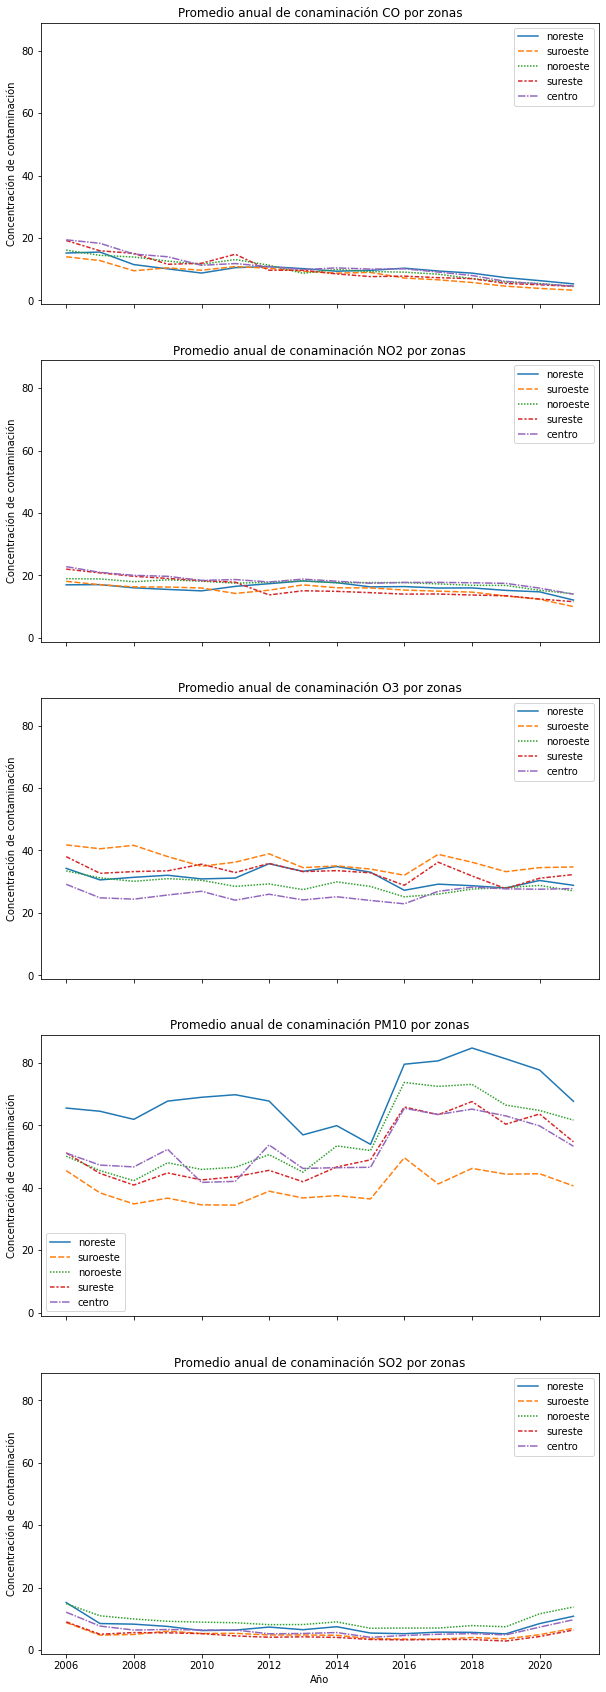

In [155]:
fig, axes = plt.subplots(5, 1, figsize=(10, 30), sharex=True, sharey=True)
sns.lineplot(data=CO_mensual.resample('Y', on='fecha').mean(), ax=axes[0])
axes[0].set(title='Promedio anual de conaminación CO por zonas',ylabel='Concentración de contaminación',xlabel="Año")

sns.lineplot(data=NO2_mensual.resample('Y', on='fecha').mean(), ax=axes[1])
axes[1].set(title='Promedio anual de conaminación NO2 por zonas',ylabel='Concentración de contaminación',xlabel="Año")

sns.lineplot(data=O3_mensual.resample('Y', on='fecha').mean(), ax=axes[2])
axes[2].set(title='Promedio anual de conaminación O3 por zonas',ylabel='Concentración de contaminación',xlabel="Año")

sns.lineplot(data=PM10_mensual.resample('Y', on='fecha').mean(), ax=axes[3])
axes[3].set(title='Promedio anual de conaminación PM10 por zonas',ylabel='Concentración de contaminación',xlabel="Año")

sns.lineplot(data=SO2_mensual.resample('Y', on='fecha').mean(), ax=axes[4])
axes[4].set(title='Promedio anual de conaminación SO2 por zonas',ylabel='Concentración de contaminación',xlabel="Año")

**#BOXPLOTS**

Revisando datos atipicos y medidas estadisticas como los cuartiles

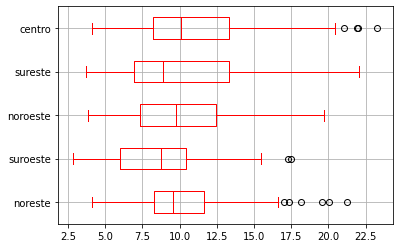

In [156]:
CO_mensual.boxplot(vert=False,color='r')

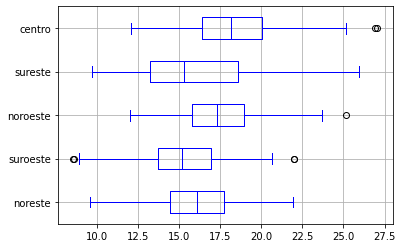

In [157]:
NO2_mensual.boxplot(vert=False,color='b')

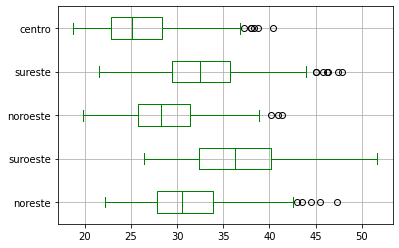

In [158]:
O3_mensual.boxplot(vert=False,color='g')

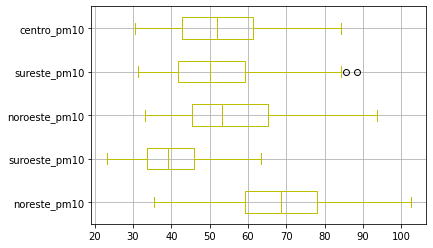

In [ ]:
PM10_mensual.boxplot(vert=False,color='y')

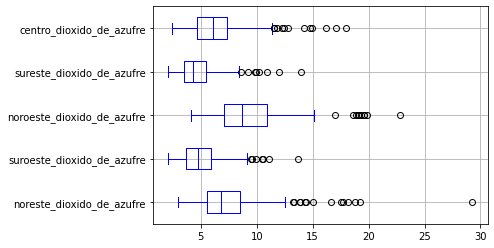

In [ ]:
SO2_mensual.boxplot(vert=False,color='b')

# **TABLAS DE FRECUENCIAS**

In [160]:
lista=['noreste','noroeste','sureste',
       'suroeste', 'centro']
for z in lista:
    segmentos = pd.cut(CO_mensual[z], 10)
    tabla= CO_mensual[z].groupby(segmentos).count()
    print(tabla)

noreste
(4.134, 5.863]      13
(5.863, 7.575]      27
(7.575, 9.287]      49
(9.287, 10.999]     44
(10.999, 12.711]    30
(12.711, 14.422]    14
(14.422, 16.134]     6
(16.134, 17.846]     5
(17.846, 19.558]     1
(19.558, 21.27]      3
Name: noreste, dtype: int64
noroeste
(3.841, 5.441]      23
(5.441, 7.026]      19
(7.026, 8.61]       25
(8.61, 10.195]      36
(10.195, 11.779]    29
(11.779, 13.364]    23
(13.364, 14.948]    20
(14.948, 16.533]     4
(16.533, 18.117]     8
(18.117, 19.702]     5
Name: noroeste, dtype: int64
sureste
(3.682, 5.535]      30
(5.535, 7.368]      31
(7.368, 9.202]      43
(9.202, 11.036]     19
(11.036, 12.87]     17
(12.87, 14.704]     18
(14.704, 16.537]    18
(16.537, 18.371]     5
(18.371, 20.205]     8
(20.205, 22.039]     3
Name: sureste, dtype: int64
suroeste
(2.83, 4.31]        27
(4.31, 5.776]       14
(5.776, 7.241]      26
(7.241, 8.707]      28
(8.707, 10.173]     38
(10.173, 11.639]    28
(11.639, 13.104]    14
(13.104, 14.57]     11
(14.57,

In [161]:
for z in lista:
    segmentos = pd.cut(NO2_mensual[z], 10)
    tabla= NO2_mensual[z].groupby(segmentos).count()
    print(tabla)

noreste
(9.582, 10.831]      3
(10.831, 12.068]     4
(12.068, 13.305]    14
(13.305, 14.541]    32
(14.541, 15.778]    35
(15.778, 17.015]    36
(17.015, 18.252]    28
(18.252, 19.489]    27
(19.489, 20.726]     8
(20.726, 21.962]     5
Name: noreste, dtype: int64
noroeste
(11.995, 13.322]     6
(13.322, 14.636]    13
(14.636, 15.949]    36
(15.949, 17.263]    37
(17.263, 18.577]    41
(18.577, 19.89]     26
(19.89, 21.204]     17
(21.204, 22.518]    14
(22.518, 23.831]     1
(23.831, 25.145]     1
Name: noroeste, dtype: int64
sureste
(9.7, 11.338]        5
(11.338, 12.96]     37
(12.96, 14.582]     38
(14.582, 16.204]    36
(16.204, 17.826]    20
(17.826, 19.448]    20
(19.448, 21.071]    20
(21.071, 22.693]     6
(22.693, 24.315]     7
(24.315, 25.937]     3
Name: sureste, dtype: int64
suroeste
(8.555, 9.913]       6
(9.913, 11.258]      5
(11.258, 12.603]    16
(12.603, 13.948]    30
(13.948, 15.293]    46
(15.293, 16.638]    30
(16.638, 17.983]    34
(17.983, 19.328]    12
(19.328

In [162]:
for z in lista:
    segmentos = pd.cut(O3_mensual[z], 10)
    tabla= O3_mensual[z].groupby(segmentos).count()
    print(tabla)

noreste
(22.184, 24.721]     8
(24.721, 27.232]    32
(27.232, 29.743]    41
(29.743, 32.255]    42
(32.255, 34.766]    31
(34.766, 37.277]    16
(37.277, 39.788]    10
(39.788, 42.3]       5
(42.3, 44.811]       5
(44.811, 47.322]     2
Name: noreste, dtype: int64
noroeste
(19.798, 21.974]     5
(21.974, 24.128]    20
(24.128, 26.282]    29
(26.282, 28.436]    43
(28.436, 30.59]     33
(30.59, 32.744]     27
(32.744, 34.898]    14
(34.898, 37.052]    12
(37.052, 39.206]     6
(39.206, 41.36]      3
Name: noroeste, dtype: int64
sureste
(21.529, 24.189]     3
(24.189, 26.821]    16
(26.821, 29.454]    29
(29.454, 32.087]    42
(32.087, 34.72]     38
(34.72, 37.353]     31
(37.353, 39.986]    12
(39.986, 42.619]     9
(42.619, 45.252]     7
(45.252, 47.884]     5
Name: sureste, dtype: int64
suroeste
(26.339, 28.898]    14
(28.898, 31.431]    22
(31.431, 33.964]    37
(33.964, 36.497]    29
(36.497, 39.03]     33
(39.03, 41.563]     15
(41.563, 44.096]    17
(44.096, 46.629]    14
(46.629

In [163]:
for z in lista:
    segmentos = pd.cut(PM10_mensual[z], 10)
    tabla= PM10_mensual[z].groupby(segmentos).count()
    print(tabla)

noreste
(35.398, 42.165]      1
(42.165, 48.866]     12
(48.866, 55.566]     16
(55.566, 62.266]     37
(62.266, 68.966]     32
(68.966, 75.666]     35
(75.666, 82.366]     24
(82.366, 89.066]     15
(89.066, 95.766]     14
(95.766, 102.466]     6
Name: noreste, dtype: int64
noroeste
(33.029, 39.151]    18
(39.151, 45.211]    29
(45.211, 51.272]    38
(51.272, 57.333]    32
(57.333, 63.393]    19
(63.393, 69.454]    19
(69.454, 75.514]    15
(75.514, 81.575]    12
(81.575, 87.636]     4
(87.636, 93.696]     6
Name: noroeste, dtype: int64
sureste
(31.152, 36.93]     24
(36.93, 42.652]     33
(42.652, 48.373]    32
(48.373, 54.094]    31
(54.094, 59.816]    25
(59.816, 65.537]    19
(65.537, 71.258]     7
(71.258, 76.98]     11
(76.98, 82.701]      6
(82.701, 88.422]     4
Name: sureste, dtype: int64
suroeste
(23.069, 27.15]      5
(27.15, 31.189]     22
(31.189, 35.229]    36
(35.229, 39.269]    36
(39.269, 43.309]    25
(43.309, 47.349]    25
(47.349, 51.389]    24
(51.389, 55.428]    

In [164]:
for z in lista:
    segmentos = pd.cut(SO2_mensual[z], 10)
    tabla= SO2_mensual[z].groupby(segmentos).count()
    print(tabla)

noreste
(2.915, 5.574]      50
(5.574, 8.207]      88
(8.207, 10.839]     35
(10.839, 13.472]     7
(13.472, 16.104]     5
(16.104, 18.737]     4
(18.737, 21.369]     2
(21.369, 24.002]     0
(24.002, 26.634]     0
(26.634, 29.267]     1
Name: noreste, dtype: int64
noroeste
(4.097, 5.981]      17
(5.981, 7.846]      57
(7.846, 9.712]      46
(9.712, 11.577]     36
(11.577, 13.443]    19
(13.443, 15.308]     7
(15.308, 17.173]     1
(17.173, 19.039]     2
(19.039, 20.904]     6
(20.904, 22.769]     1
Name: noroeste, dtype: int64
sureste
(2.058, 3.259]      40
(3.259, 4.449]      65
(4.449, 5.638]      42
(5.638, 6.828]      27
(6.828, 8.017]       7
(8.017, 9.207]       4
(9.207, 10.397]      4
(10.397, 11.586]     1
(11.586, 12.776]     1
(12.776, 13.965]     1
Name: sureste, dtype: int64
suroeste
(2.048, 3.22]       28
(3.22, 4.381]       56
(4.381, 5.542]      49
(5.542, 6.703]      30
(6.703, 7.864]      18
(7.864, 9.024]       3
(9.024, 10.185]      4
(10.185, 11.346]     3
(11.346

**Graficos de densidad**

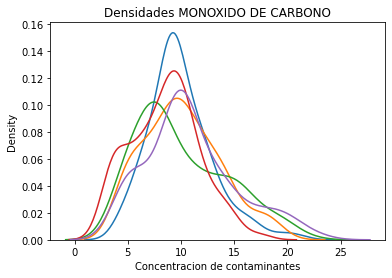

In [186]:
for i in lista:
    ax=sns.kdeplot(x=CO_mensual[i])
    ax.set(title="Densidades MONOXIDO DE CARBONO", xlabel="Concentracion de contaminantes")
    ax.legend=i

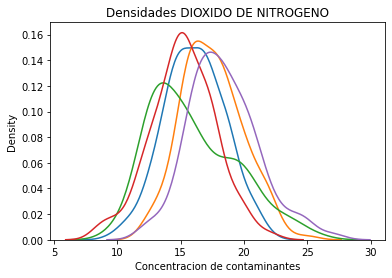

In [187]:
for i in lista:
    ax=sns.kdeplot(x=NO2_mensual[i])
    ax.set(title="Densidades DIOXIDO DE NITROGENO", xlabel="Concentracion de contaminantes")

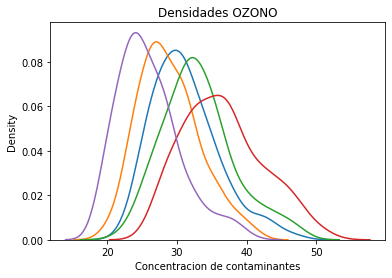

In [188]:
for i in lista:
    ax=sns.kdeplot(x=O3_mensual[i])
    ax.set(title="Densidades OZONO", xlabel="Concentracion de contaminantes")

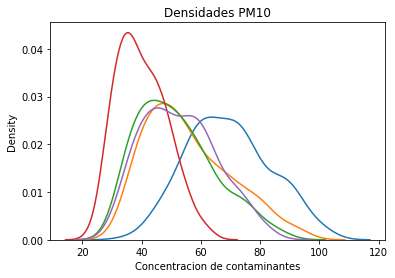

In [190]:
for i in lista:
    ax=sns.kdeplot(x=PM10_mensual[i])
    ax.set(title="Densidades PM10", xlabel="Concentracion de contaminantes")

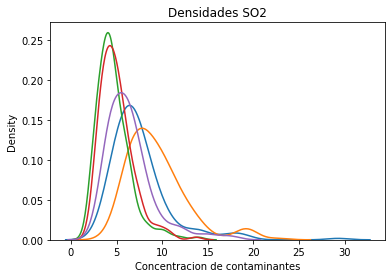

In [191]:
for i in lista:
    ax=sns.kdeplot(x=SO2_mensual[i])
    ax.set(title="Densidades SO2", xlabel="Concentracion de contaminantes")

VISUALIZACIONES AVANZADAS

In [22]:
!pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 5.2MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [170]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [171]:
Df_total_anual['fecha'] = Df_total_anual.index

In [212]:
lista_zonas = ['suroeste','sureste','noreste','noroeste','centro']
for zona in lista_zonas:
    fig = px.treemap( Df_total_anual, path=['fecha','categoria'], values=zona, title=zona)
    fig.show()